# 多層感知器的實作案例

## 實作案例 : 鳶尾花資料集的多元分類



In [5]:
# Ch6_1_1.py

import pandas as pd

df = pd.read_csv("./iris_data.csv")
print(df.head())
print(df.shape)
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


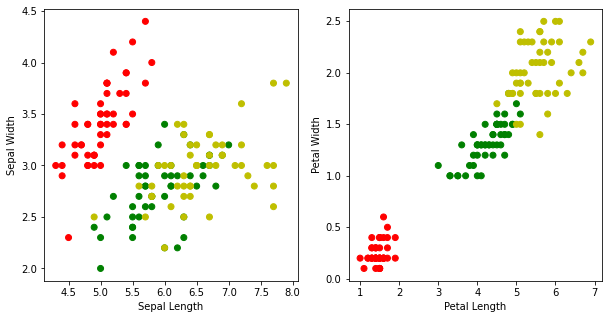

In [10]:
# Ch6_1_1b.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 載入資料集
df = pd.read_csv("./iris_data.csv")
target_mapping = {"setosa": 0,
                 "versicolor": 1,
                 "virginica": 2}
Y=df["target"]
print(Y)
Y = df["target"].map(target_mapping)
print(Y)
# 使用MatplotLib顯示視覺化圖表
colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=.5)
plt.scatter(df["sepal_length"],df["sepal_width"],color=colmap[Y])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1,2,2)
plt.scatter(df["petal_length"],df["petal_width"],color=colmap[Y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


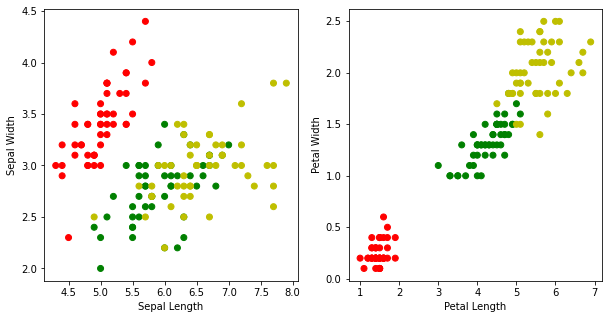

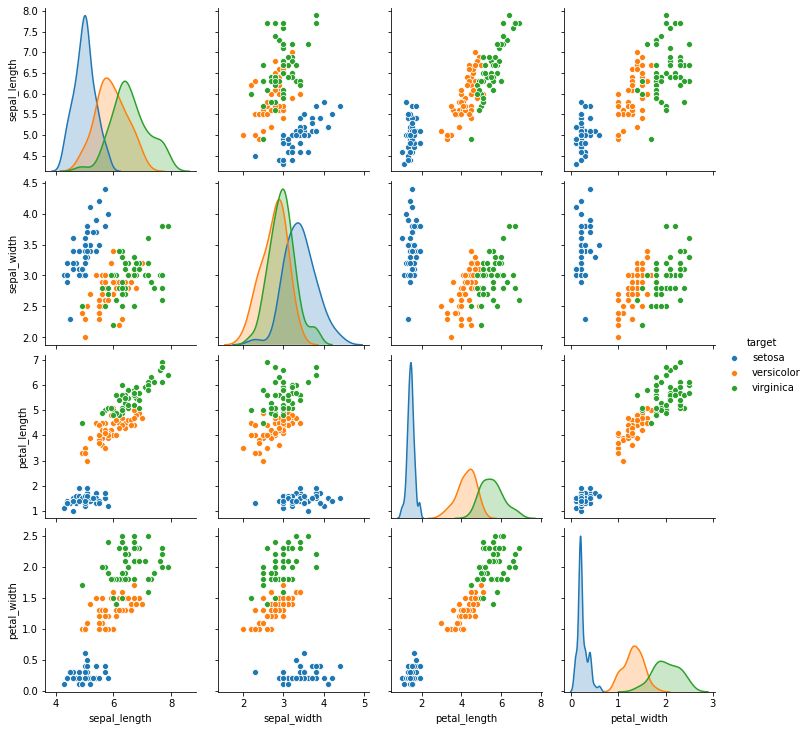

In [12]:
# Ch6_1_1b.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 載入資料集
df = pd.read_csv("./iris_data.csv")
target_mapping = {"setosa": 0,
                 "versicolor": 1,
                 "virginica": 2}
Y=df["target"]
print(Y)
Y = df["target"].map(target_mapping)
print(Y)
# 使用MatplotLib顯示視覺化圖表
colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=.5)
plt.scatter(df["sepal_length"],df["sepal_width"],color=colmap[Y])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1,2,2)
plt.scatter(df["petal_length"],df["petal_width"],color=colmap[Y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
sns.pairplot(df, hue="target")

In [16]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(7)  # 指定亂數種子
# 載入資料集
df = pd.read_csv("./iris_data.csv")
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆
# 建立Keras的Sequential模型
model = Sequential()
model.add(Dense(6, input_shape=(4,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
print("Training ...")
model.fit(X_train, Y_train, epochs=100, batch_size=5)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: iris.h5 ...")
model.save("iris.h5")


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


Training ...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 1.1825 - acc: 0.0083
Epoch 2/100
120/120 [==============================] - 0s 394us/step - loss: 1.1246 - acc: 0.1000
Epoch 3/100
120/120 [==============================] - 0s 517us/step - loss: 1.0715 

In [20]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

np.random.seed(7)  # 指定亂數種子
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}
# 載入資料集
df = pd.read_csv("./iris_data.csv")
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("iris.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict_classes(X_test)
print(Y_pred)
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)
# 顯示混淆矩陣
tb = pd.crosstab(Y_target, Y_pred, rownames=["label"], colnames=["predict"])
print(tb)
tb.to_html("Ch6_1_3.html")



Testing ...
測試資料集的準確度 = 0.97

Predicting ...
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 2 0 2 1 2 1 0]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]
predict  0   1  2
label            
0        9   0  0
1        0  11  1
2        0   0  9


In [31]:
## 6-2 實作案例 : 鐵達尼號資料集的生存分析

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

# 指定亂數種子
np.random.seed(5)

# 載入資料集
df = pd.read_csv("./titanic_data.csv")
print(df.head())
print(df.shape)
print(df.describe())
print(df.info())
print(df.isnull().sum())


   pclass  survived                                             name     sex  \
0       1         1                    Allen  Miss. Elisabeth Walton  female   
1       1         1                   Allison  Master. Hudson Trevor    male   
2       1         0                     Allison  Miss. Helen Loraine  female   
3       1         0             Allison  Mr. Hudson Joshua Creighton    male   
4       1         0  Allison  Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  
0  29.0000      0      0   24160  211.3375       B5        S  
1   0.9167      1      2  113781  151.5500  C22 C26        S  
2   2.0000      1      2  113781  151.5500  C22 C26        S  
3  30.0000      1      2  113781  151.5500  C22 C26        S  
4  25.0000      1      2  113781  151.5500  C22 C26        S  
(1309, 11)
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.00000

embarked_one_hot = pd.get_dummies(df["embarked"], prefix="embarked")

| Embarked_C | Embarked_S | Embarked_Q |
|----|----|----|
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |

In [39]:
## 6-2 實作案例 : 鐵達尼號資料集的生存分析

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

# 指定亂數種子
np.random.seed(5)

# 載入資料集
df = pd.read_csv("./titanic_data.csv")

# *** Start of 資料預處理 ***
# 刪除不需要的欄位
df = df.drop(["name","ticket","cabin"], axis=1)

# 處理遣失資料 
# ????? 為什麼用 [[]]
df[["age"]] = df[["age"]].fillna(value=df[["age"]].mean()) # 以平均值填入
df[["fare"]] = df[["fare"]].fillna(value=df[["fare"]].mean()) # 以平均值填入 
df[["embarked"]] = df[["embarked"]].fillna(value=df["embarked"].value_counts().idxmax()) # 以最多人登船的港口填入
print(df.describe())
print(df["embarked"].value_counts())
print(df["embarked"].value_counts().idxmax())

# 轉換分類資料 
df["sex"] = df["sex"].map({"female":1, "male": 0}).astype(int)
# Embarked欄位的One-hot編碼 

embarked_one_hot = pd.get_dummies(df["embarked"], prefix="embarked")
df = df.drop("embarked", axis=1)
df = df.join(embarked_one_hot)
print(df.head())
# 將標籤資料的 survived 欄位移至最後
df_survived = df.pop("survived")
df["servived"] = df_survived
print(df.head())
# 分割成訓練和測試資料集
mask = np.random.rand(len(df))<0.8
df_train = df[mask]
df_test = df[~mask] # ~就是 Not
print("Train:", df_train.shape)
print("Test:", df_test.shape)
# 儲存成訓練和測試資料集的 CSV 檔案
df_train.to_csv("titanic_train.csv", index=False)
df_test.to_csv("titanic_test.csv", index=False)

# *** Enf of 資料預處理 ***


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    12.883199     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    22.000000     0.000000     0.000000   
50%       3.000000     0.000000    29.881135     0.000000     0.000000   
75%       3.000000     1.000000    35.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare  
count  1309.000000  
mean     33.295479  
std      51.738879  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  
S    916
C    270
Q    123
Name: embarked, dtype: int64
S
   pclass  survived  sex      age  sibsp  parch      fare  embarked_C  \
0       1    

In [41]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

seed=7
np.random.seed(seed)

# 載入剛才訓練資料和測試資料
df_train = pd.read_csv("./titanic_train.csv")
df_test = pd.read_csv("./titanic_test.csv")
dataset_train = df_train.values
dataset_test = df_test.values
# 分割成訓練和測試資料集
X_train = dataset_train[:, :9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, :9]
Y_test = dataset_test[:, 9]
# 特徵標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)
# 建立Keras的Sequential模型
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
             metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=10)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 12        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
Train on 840 samples, validate on 210 samples
Epoch 1/100
840/840 [==============================] - 1s 1ms/step - loss: 0.6727 - acc: 0.6155 - val_loss: 0.6325 - val_acc: 0.7429
Epoch 2/100
840/840 [==============================] - 0s 232us/step - loss: 0.5964 - acc: 0.7179 - val_loss: 0.5697 - val_acc: 0.7524
Epoch 3/100
840/840 [==============================] - 0s 231us/step - l